In [ ]:
#อนุญาตการเข้าถึง Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import ไลบรารี
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

#นำเข้าข้อมูล

In [ ]:
#โหลดข้อมูล
train_df = pd.read_csv('/content/drive/MyDrive/ฺButterfly/Training_set.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ฺButterfly/Testing_set.csv')
#โหลดโฟเดอร์รูปภาพ
train_image = '/content/drive/MyDrive/ฺButterfly/train'
test_image = '/content/drive/MyDrive/ฺButterfly/test'

In [ ]:
r,c = train_df.shape
print(r)
print(c)

r,c =test_df.shape
print(r)
print(c)

6499
2
2786
1


In [ ]:
train_df.columns

Index(['image', 'species_name '], dtype='object')

In [ ]:
train_df.dtypes

,0
image,object
species_name,object


In [ ]:
#แสดงผลลัพธ์ 5 แถวแรก
train_df.head()

,image,species_name
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [ ]:
# ฟังก์ชันโหลดและแสดงภาพ
from PIL import Image
def load_and_display_image(image_name):
    image_path = os.path.join(train_image, image_name)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # ซ่อนแกน
    plt.show()

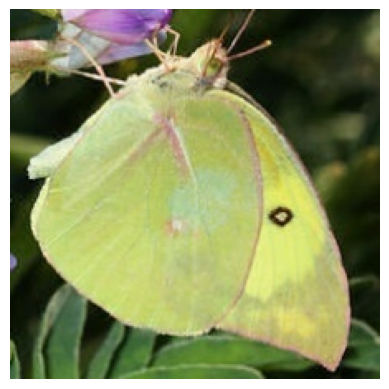

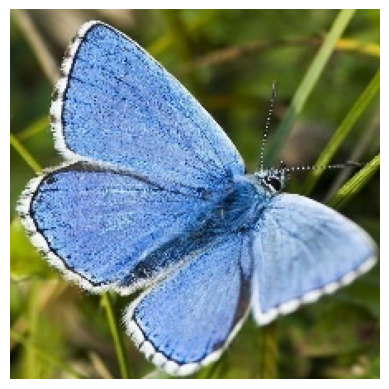

In [ ]:
# โหลดและแสดงรูปภาพตัวอย่าง
import os
for i in range(2):  # แสดงตัวอย่าง 2 รูปแรก
    image_name = train_df.loc[i, 'image']
    load_and_display_image(image_name)

#การจัดการข้อมูลเเละเตรียมข้อมูล

In [ ]:
#แสดงจำนวน missing values ทุก attributes ตัวเลขที่แสดงด้านหลังคือจำนวนแถวที่ attribute นั้นมีค่า missing values (์NaN)
train_df.isnull().sum()

,0
image,0
species_name,0


In [ ]:
# สร้าง LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# แปลงป้ายกำกับจากตัวอักษรเป็นค่าตัวเลข
train_df['species_id'] = label_encoder.fit_transform(train_df[ 'species_name '])
# ตรวจสอบผลลัพธ์
print(train_df[[ 'species_name ', 'species_id']].head())


              species_name   species_id
0          SOUTHERN DOGFACE          66
1                    ADONIS           0
2            BROWN SIPROETA          12
3                   MONARCH          44
4  GREEN CELLED CATTLEHEART          33


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='species_id'>

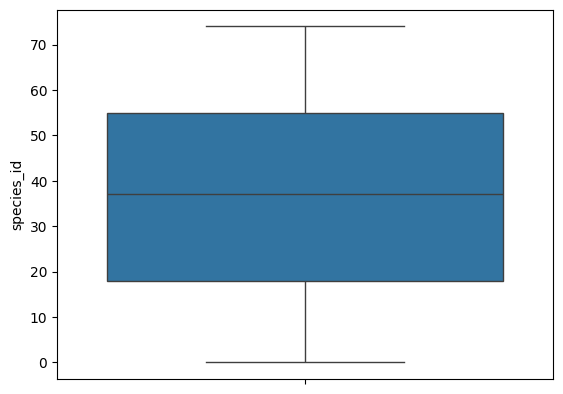

In [ ]:
#ดูค่าผิดปกติแอทริบิวต์ sleep_rem โดยรวม
sns.boxplot(train_df.species_id)

In [ ]:
print("\nจำนวน species_id ที่ซ้ำกัน:")
print(train_df['species_id'].value_counts())


จำนวน species_id ที่ซ้ำกัน:
species_id
45    131
64    107
5     100
12     99
23     97
     ... 
2      74
30     73
39     73
24     72
72     71
Name: count, Length: 75, dtype: int64


In [ ]:
# วิธีที่ 1: ลบแถวที่ซ้ำกันออก โดยเก็บแถวแรกที่พบ
#df_drop_duplicates = df.drop_duplicates(subset=['species_id'])

#print("\nหลังจากลบแถวที่ซ้ำ:")
#print(df_drop_duplicates)

In [ ]:
import os
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
def preprocess_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image at {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    return img.flatten()

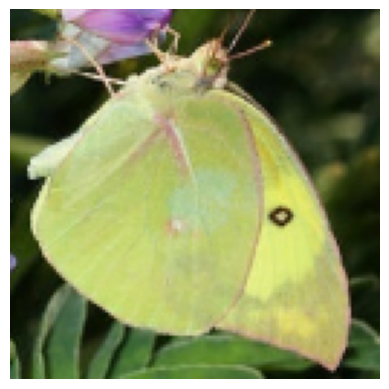

Processed Image Shape: (49152,)
First 10 pixel values: [0.09803922 0.16862746 0.12156863 0.10196079 0.16470589 0.11372549
 0.10588235 0.17254902 0.10980392 0.10980392]


In [ ]:
# เช็คว่ามีการปรับภาพเเล้วจริง
import matplotlib.pyplot as plt
# เลือกไฟล์ภาพจากโฟลเดอร์ train เพื่อทดสอบ
sample_image_path = os.path.join(train_image, 'train_image', '/content/drive/MyDrive/ฺButterfly/train/Image_1.jpg')  # แก้ไขให้ตรงกับชื่อโฟลเดอร์และไฟล์จริง

# ประมวลผลภาพ
processed_image = preprocess_image(sample_image_path)

# แสดงผลภาพ
plt.imshow(processed_image.reshape(128, 128, 3))  # แสดงภาพที่ปรับขนาดแล้ว
plt.axis('off')  # ปิดแกน
plt.show()

# แสดงค่าพิกเซลของภาพ
print("Processed Image Shape:", processed_image.shape)  # ควรแสดงเป็น (150528,) สำหรับภาพ 224x224x3
print("First 10 pixel values:", processed_image[:10])  # แสดง 10 ค่าพิกเซลแรก


In [ ]:
def process_images(folder, df, target_size=(128, 128)):
    images = []
    labels = []
    failed_images = []

    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing images"):
        img_file = row['image']
        label = row['species_id']
        img_path = os.path.join(folder, img_file)

        if not os.path.exists(img_path):
            print(f"Image file not found: {img_path}")
            failed_images.append(img_file)
            continue

        img_vector = preprocess_image(img_path, target_size)
        if img_vector is not None:
            images.append(img_vector)
            labels.append(label)
        else:
            failed_images.append(img_file)

    print(f"Failed to process {len(failed_images)} images")
    return np.array(images), np.array(labels), failed_images

In [ ]:
# ตรวจสอบโครงสร้างของ DataFrame
print(train_df.head())
print("\nColumns:", train_df.columns)

         image             species_name   species_id
0  Image_1.jpg          SOUTHERN DOGFACE          66
1  Image_2.jpg                    ADONIS           0
2  Image_3.jpg            BROWN SIPROETA          12
3  Image_4.jpg                   MONARCH          44
4  Image_5.jpg  GREEN CELLED CATTLEHEART          33

Columns: Index(['image', 'species_name ', 'species_id'], dtype='object')


In [ ]:
# ตรวจสอบเส้นทางไฟล์
print("\nTrain image folder:", train_image)
print("Example file path:", os.path.join(train_image, train_df['image'].iloc[0]))


Train image folder: /content/drive/MyDrive/ฺButterfly/train
Example file path: /content/drive/MyDrive/ฺButterfly/train/Image_1.jpg


In [ ]:
# ใช้งานฟังก์ชัน
X, y, failed_images = process_images(train_image, train_df)

Processing images: 100%|██████████| 6499/6499 [47:41<00:00,  2.27it/s]


Failed to process 0 images


In [ ]:
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)
print("Number of failed images:", len(failed_images))


Shape of X: (6499, 49152)
Shape of y: (6499,)
Number of failed images: 0


In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
import pandas as pd

# สร้าง DataFrame สำหรับ Train
train_df = pd.DataFrame(X_train)  # สร้าง DataFrame สำหรับ Features
train_df['species_id'] = y_train  # เพิ่มป้ายกำกับสายพันธุ์เข้าไป

# สร้าง DataFrame สำหรับ Test
test_df = pd.DataFrame(X_test)  # สร้าง DataFrame สำหรับ Features
test_df['species_id'] = y_test  # เพิ่มป้ายกำกับสายพันธุ์เข้าไป


In [ ]:
# บันทึกข้อมูล Train ลงในไฟล์ CSV
train_df.to_csv('train_data.csv', index=False)

# บันทึกข้อมูล Test ลงในไฟล์ CSV
test_df.to_csv('test_data.csv', index=False)


In [ ]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (5199, 49152)
Shape of test set: (1300, 49152)


In [ ]:
import numpy as np
# ตรวจสอบการกระจายของคลาส
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(dict(zip(unique, counts)))  # ตรวจสอบการกระจายของคลาส

{0: 88, 1: 75, 2: 74, 3: 85, 4: 90, 5: 100, 6: 97, 7: 83, 8: 81, 9: 85, 10: 75, 11: 86, 12: 99, 13: 90, 14: 83, 15: 95, 16: 85, 17: 93, 18: 87, 19: 92, 20: 87, 21: 90, 22: 94, 23: 97, 24: 72, 25: 94, 26: 93, 27: 92, 28: 95, 29: 82, 30: 73, 31: 78, 32: 94, 33: 88, 34: 86, 35: 81, 36: 95, 37: 81, 38: 81, 39: 73, 40: 87, 41: 86, 42: 76, 43: 96, 44: 90, 45: 131, 46: 87, 47: 96, 48: 76, 49: 78, 50: 90, 51: 84, 52: 86, 53: 84, 54: 85, 55: 79, 56: 92, 57: 77, 58: 82, 59: 96, 60: 89, 61: 86, 62: 97, 63: 83, 64: 107, 65: 90, 66: 87, 67: 87, 68: 83, 69: 76, 70: 84, 71: 81, 72: 71, 73: 75, 74: 76}


In [ ]:
# หาคลาสที่มีจำนวนตัวอย่างน้อยสุดและมากสุด
min_class = min(class_distribution, key=class_distribution.get)
max_class = max(class_distribution, key=class_distribution.get)

# แสดงผล
print(f"คลาสที่มีจำนวนตัวอย่างน้อยสุด: {min_class} ({class_distribution[min_class]} ตัวอย่าง)")
print(f"คลาสที่มีจำนวนตัวอย่างมากสุด: {max_class} ({class_distribution[max_class]} ตัวอย่าง)")

คลาสที่มีจำนวนตัวอย่างน้อยสุด: 72 (71 ตัวอย่าง)
คลาสที่มีจำนวนตัวอย่างมากสุด: 45 (131 ตัวอย่าง)


จากการเเสดงการกระจายเเละจำนวน  Class มีข้อมูลไม่สมดุลกัน เเก้ปัญหาโดยใช้ SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN

# สร้างตัวอย่างใหม่ด้วย SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

# ตรวจสอบการกระจายตัวของคลาสใหม่
unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution_resampled = dict(zip(unique, counts))
print("การกระจายของคลาสหลังจากทำ SMOTEENN:", class_distribution_resampled)


การกระจายของคลาสหลังจากทำ SMOTEENN: {0: 78, 1: 94, 2: 48, 3: 35, 4: 27, 5: 23, 6: 10, 7: 60, 8: 43, 9: 63, 10: 66, 11: 37, 12: 26, 13: 47, 14: 35, 15: 27, 16: 32, 17: 26, 18: 29, 19: 37, 20: 50, 21: 33, 22: 22, 23: 12, 24: 66, 25: 26, 26: 32, 27: 31, 28: 27, 29: 49, 30: 62, 31: 44, 32: 28, 33: 44, 34: 42, 35: 32, 36: 20, 37: 67, 38: 40, 39: 53, 40: 34, 41: 53, 42: 55, 43: 22, 44: 12, 46: 35, 47: 52, 48: 53, 49: 45, 50: 15, 51: 36, 52: 33, 53: 48, 54: 52, 55: 50, 56: 26, 57: 48, 58: 50, 59: 23, 60: 46, 61: 32, 62: 28, 63: 38, 64: 24, 65: 28, 66: 49, 67: 31, 68: 36, 69: 54, 70: 63, 71: 46, 72: 71, 73: 53, 74: 35}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# แบ่งข้อมูลใหม่หลังจาก resampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 250],
    'max_depth': [10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 2]
}

# สร้าง GridSearchCV object
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid,
                       cv=3,
                       n_jobs=-1,
                       scoring=make_scorer(f1_score, average='weighted'))



In [ ]:
# ฝึกโมเดล
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 250]},
             scoring=make_scorer(f1_score, response_method='predict', average=weighted))

In [ ]:
# แสดงพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", rf_grid.best_params_)

# ใช้โมเดลที่ดีที่สุดในการทำนาย
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# แสดงผลลัพธ์
print("Random Forest Classifier (optimized):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=1))

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
Random Forest Classifier (optimized):
Accuracy: 0.8716666666666667
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.82      0.95      0.88        19
           2       0.90      0.90      0.90        10
           3       1.00      0.71      0.83         7
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         5
           6       1.00      0.00      0.00         2
           7       1.00      1.00      1.00        12
           8       0.90      1.00      0.95         9
           9       0.72      1.00      0.84        13
          10       0.75      0.69      0.72        13
          11       1.00      0.71      0.83         7
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         9
          14       

โมเดล Decision Tree Classifier

In [ ]:
# แบ่งข้อมูลใหม่หลังจาก resampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (2399, 49152)
Shape of test set: (600, 49152)


In [ ]:
from sklearn.decomposition import PCA

# ใช้ PCA เพื่อลดมิติของข้อมูล
pca = PCA(n_components=100)  # ลดเหลือ 100 มิติ
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Shape of training set after PCA:", X_train_pca.shape)
print("Shape of test set after PCA:", X_test_pca.shape)


Shape of training set after PCA: (2399, 100)
Shape of test set after PCA: (600, 100)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# สร้างและฝึก Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
dt_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# ทำนายผลและประเมินโมเดล
y_pred = dt_model.predict(X_test_pca)

# แสดงความแม่นยำและรายงาน
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred,zero_division=1))  # แก้ไขที่นี่

Accuracy: 0.24166666666666667
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       1.00      0.79      0.88        19
           2       1.00      0.00      0.00        10
           3       1.00      0.00      0.00         7
           4       0.18      0.40      0.25         5
           5       1.00      0.00      0.00         5
           6       1.00      0.00      0.00         2
           7       0.38      0.25      0.30        12
           8       0.44      0.78      0.56         9
           9       0.07      1.00      0.14        13
          10       0.20      0.08      0.11        13
          11       1.00      0.00      0.00         7
          12       1.00      0.20      0.33         5
          13       1.00      0.78      0.88         9
          14       1.00      0.00      0.00         7
          15       1.00      0.00      0.00         5
          16       1.00      0.00      0.00        

**ใช้เวลาฝึกประมาณ 8 นาที 30 วิ**

In [ ]:
import joblib

# บันทึกโมเดล Random Forest ที่ดีที่สุด
joblib.dump(best_rf_model, 'best_random_forest_model.joblib')

# บันทึกโมเดล Decision Tree
#joblib.dump(dt_model, 'best_decision_tree_model.joblib')

print("\nBest Random Forest and Decision Tree models saved to disk.")



Best Random Forest and Decision Tree models saved to disk.
